# Исследование объявлений о продаже квартир

В распоряжении — данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Основная цель исследования - научиться определять рыночную стоимость объектов недвижимости, задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Всего в датасете изначально было 23 699 записей и 22 признака. Среди признаков есть информация о количестве фотографий, цене квартиры, общей площади, дне публикации объявления, количестве комнат, высоте потолков, этажности дома, жилой площади, этаже квартиры, о том, является ли квартира апартаментами, студией, имеет ли она свободную планировку, о площади кухни, количестве балконов, названии населенного пункта, расстоянии до ближайшего аэропорта, до центра города, парков и водоемов, а также о количестве парков и водоемов в радиусе 3 км, и о количестве дней, которое объявление было размещено объявление.

План работы:

1. Предобработка данных
- работа с пропущенными значениями (удаление, замена, оставление нетронутыми),
- изменение типов данных в некоторых столбцах,
- работа с неявными дубликатами
- логическая замена или удаление аномальных, выбивающихся значений
2. Добавление новых столбцов


3. Исследовательский анализ данных
- построение гистограмм по каждому параметру
- изучение того, какие факторы больше всего влияют на стоимость квартир
- подсчет цены одного кв. м. в самых популярных населенных пунктов
- изучение изменения цены с отдалением от центра Санкт-Петербурга

### Откроем файл с данными и изучим общую информацию.

Загружаем библиотеки и просматриваем данные

In [ ]:
import pandas as pd
# импортируем библиотеку для лучшей визуализации графиков
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изучаем таблицу, название колонок и тип хранящихся данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы для числовых значений датасета

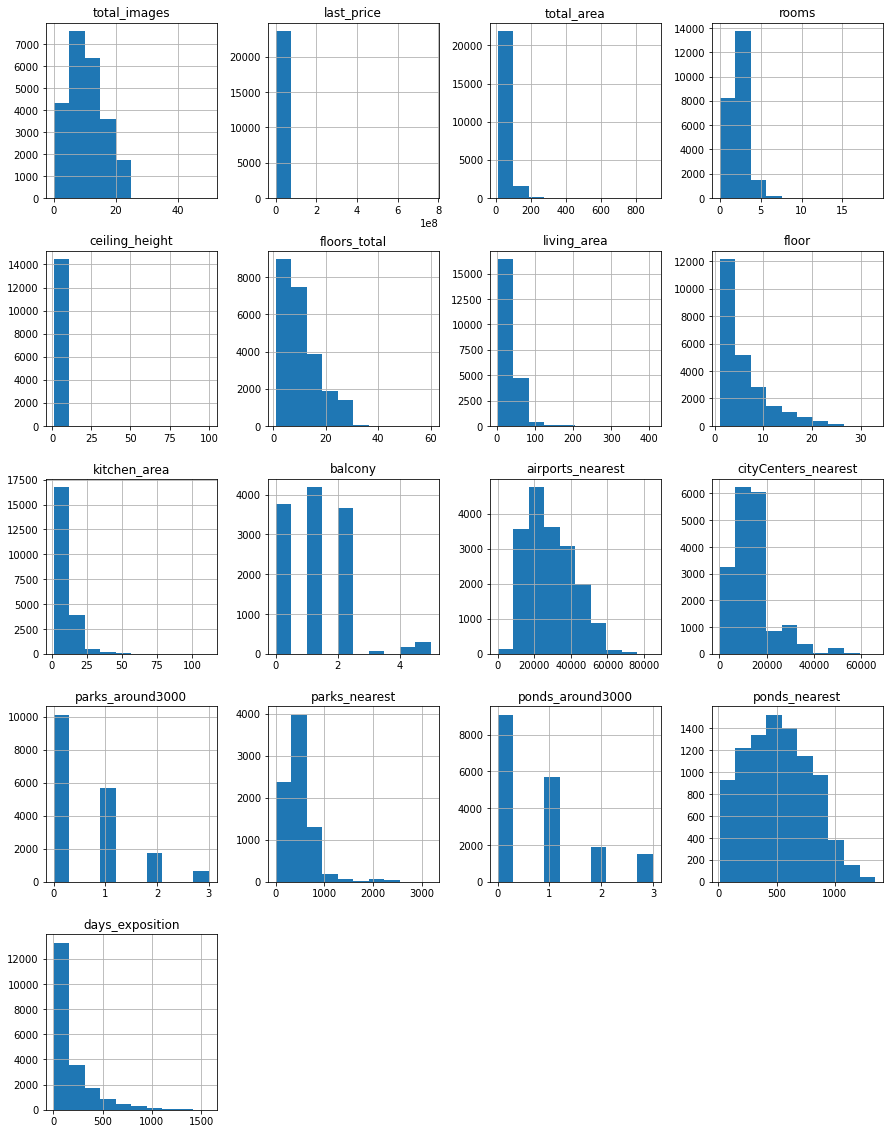

In [ ]:
data.hist(figsize=(15, 20))
None

### Предобработка данных

**2.1 Работа с пропусками**

Посчитаем количество пропусков в каждом столбце

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
(data.isnull().mean() * 100).round(2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Пропуски в столбцах `balcony`, `parks_around3000`, `ponds_around3000` можно заменить на 0, так как пропуск обозначает отсутствие балкона/парка/водоема.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Несмотря на очевидные аномальные значения высоты потолков (например, 1 метр, 24 метра и так далее), медианное значение выглядит адекватным, поэтому заменим пропуски в столбце `ceiling_height` на медиану.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Заменим пропуски в столбце `living_area` медианным значением, сопоставив количество комнат и жилую площадь квартиры. Однако сначала нужно убедиться, что выбросы или экстремальные значения не влияют на медиану.

In [ ]:
#data['living_area'].describe()

# откинем аномальные значения
good_living_area = data[data['living_area'] >= 8]
# вычислим медианное значение по количеству комнат
median_living_values = good_living_area.groupby('rooms')['living_area'].median()
# заменим пропуски этими медианными значениями
data['living_area'].fillna(data['rooms'].map(median_living_values), inplace=True)
#median_living_values

Пропуски в столбце `kitchen_area` могут быть связаны с тем, что квартира является студией. В таком случае заменим пропуски на 0. В других случаях заменим медианным значением от соотношения общей площади квартиры и площади кухни.

In [ ]:
# Посчитаем количество строк, удовлетворяющих условию
bad_rows = data.query('kitchen_area + living_area > total_area')

# Вычислим процент от всех данных
percent = (len(bad_rows) / len(data)) * 100
percent

0.30802987467825643

In [ ]:
# заменим часть пропусков
data.loc[data['studio'] == True, 'kitchen_area'] = data.loc[data['studio'] == True, 'kitchen_area'].fillna(0)

# создадим маску для строк, где условие выполняется
mask = data['living_area'] + data['kitchen_area'] > data['total_area']
# применим условие и изменение значения в столбце 'kitchen_area' с помощью метода .loc
data.loc[mask, 'kitchen_area'] -= (data['living_area'] + data['kitchen_area'] - data['total_area'])

# вычислим коэффициент корреляции между площадью кухни и общей площадью
correlation = data['kitchen_area'].corr(data['total_area'])
# заменим пропуски на основе общей площади и корреляции
data['kitchen_area'].fillna(data['total_area'] * correlation, inplace=True)

Удалим строки, в которых неизвестна этажность дома (столбец `floors_total`), таких квартира всего 0.36% от всего датасета.

In [ ]:
data = data.dropna(subset=['floors_total'])

Так же поступим со строками, в которых не указано расположение квартиры (столбец `locality_name`), таких строк 0.2% от всего датасета.

In [ ]:
data = data.dropna(subset=['locality_name'])

Проверяем, сколько осталось столбцов с пропусками.

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в столбцах о расстоянии до аэропорта, центра города, ближайшего парка и пруда, а также о количестве дней, которые объявление было размещено, и информации, является ли квартира апартаментами, оставляем незамененными, так как не можем найти им логическую замену.

Пропуски в данных могут иметь несколько причин:
1. Пользователь не заполнил некоторые пункты сведений о квартире (например, этажность дома, название населенного пункта, площадь кухни, это может произойти как предумышленно, так и не специально, например, по незнанию площади);
2. Автоматизированная система сбора информации дала сбой, и другие технические проблемы (например, сбой при получении картографических данных);
3. Удаление некоторых данных из-за конфиденциальности и других причин, например, связанных с некорректностью.

Многие пропуски крайне сильно влияют на анализ, особенно в тех случаях, когда их нельзя заменить, поэтому необходимо решать данную проблему со специалистами, которые занимаются сбором данных.

<div class="alert alert-info"; style="border-left: 7px solid purple">
<h5>🎓 <font color="purple">Дополнительный промежуточный вывод:</font></h5>    

В данных было обнаружено значительное количество пропущенных значений в различных столбцах. Для того чтобы не потерять основной объем данных, было принято решение заполнить пропуски в числовых столбцах медианными значениями, чтобы избежать искажения статистических показателей, в некоторых случаях, когда пропуски логически объяснялись, - соответствующими значениями. Часть пропусков осталось неизменной.
    
</div>


**2.2 Типы данных**

Рассмотрим типа данных в столбцах, ранее мы заметили, что столбцы first_day_exposition, floors_total, is_apartment, balcony, days_exposition, parks_around3000, ponds_around3000 содержат неверный тип данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [ ]:
# сделаем цену квартиры целым чисом
data['last_price'] = data['last_price'].astype(int)

# изменим формат записи даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# изменим тип данных в этажности дома
data['floors_total'] = data['floors_total'].astype(int)

# сделаем количество балконов целым числом
data['balcony'] = data['balcony'].astype(int)

# сделаем общую площадь целым числом
data['total_area'] = data['total_area'].astype(int)

# сделаем жилую площадь целым числом
data['living_area'] = data['living_area'].astype(int)

# сделаем площадь кухни целым числом
data['kitchen_area'] = data['kitchen_area'].astype(int)

# количество парков - целым числом
data['parks_around3000'] = data['parks_around3000'].astype(int)

# количество прудов - целым числом
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#проверим новые типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

Типы данных изменяют с целью облегчения анализа и интерпретации. Так некоторые вычисления могут проводиться быстрее (например, операции с целыми числами проводятся быстрее, чем с вещественными), легче провести сравнение и сортировку данных, если они имеют общий/упрощенный формат, некоторые операции проводятся только с определенными типами данных, поэтому правильный выбор типов данных позволяет снизить нагрузку на вычислительные ресурсы и повысить эффективность анализа данных.
Кроме того, типы данных могут быть связаны с предметной областью и смыслом данных. Например, дата и время имеют свои специфические форматы и методы обработки, которые позволяют выполнять операции, связанные со временем, такие как вычисление разницы между датами, группировка данных по временным периодам или анализ временных групп.

<div class="alert alert-info"; style="border-left: 7px solid purple">
<h5>🎓 <font color="purple">Дополнительный промежуточный вывод:</font></h5>    

Для удобства и оптимизации работы с данными, были изменены типы данных для некоторых столбцов. Например, столбцы с датами приведены к типу datetime, что позволит удобно работать с временными рядами и анализировать данные по времени.
    
</div>

**2.3 Уникальные значения в столбце с названиями**

In [ ]:
data['locality_name'].unique() #ужаснулись и начали исправлять

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

duplicates = ['поселок городского типа', 'городской поселок', 'поселок при железнодорожной станции']
right_locality = 'поселок'
data['locality_name'] = data['locality_name'].replace(duplicates, right_locality, regex=True)

<div class="alert alert-info"; style="border-left: 7px solid purple">
<h5>🎓 <font color="purple">Дополнительный промежуточный вывод:</font></h5>    

В процессе анализа данных было обнаружено наличие неявных дубликатов, вызванных разными способами написания населенных пунктов. Например, встречались вариации типа "поселок", "посёлок" и т.д. Для обеспечения единообразия данных и точности анализа были выявлены такие дубликаты и произведена коррекция названий населенных пунктов на общий формат. Такой подход позволил избежать искажений в статистических данных и обеспечить более надежные результаты исследования рынка недвижимости в рассматриваемом регионе.
    
</div>

**2.4 Редкие и выбивающиеся значения**

Изучим значеня в `ceiling_height` (высота потолков). Значения больше или равные 24 являются аномальными, скорее всего имелась в виду высота 2.4 метра, поэтому ее мы разделим на 10. Также аномальными считаются потолки выше 8 метров (квартиры-лофты, например, имеют потолки от 5 до 8 метров). Выбивающимися значениями являются и потолки до 2.4 метров.

In [ ]:
# разделим выбивающиеся показатели высоты потолков
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] /= 10
data[data['ceiling_height'] > 8].count() # всего таких квартир 8
data[data['ceiling_height'] < 2.4].count() # таких квартир 21

# удалим строки с выбивающейся высотой
data = data.query('ceiling_height >= 2.4 and ceiling_height <= 8')

Оптимальным количеством фотографий (столбец `total_images`) для объявления считается 10-20, однако было решено раздвинуть эти рамки до 3-25 (это реалистичные значения в зависимости от вида квартиры), другое количество становится аномальным и строки с такими данными необходимо удалить. Большое количество квартир без фотографий или количеством до 3 объясняется мошенническими объявлениями.

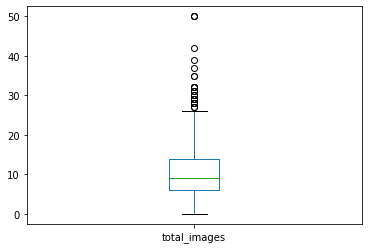

In [ ]:
data['total_images'].unique()
# исследуем выбросы с помощью графика
data['total_images'].sort_values().plot(y='total_images', kind='box')
data['total_images'].describe()
# удалим строки, не подходящие нашему условию
data = data.query('total_images >=3 and total_images <=25')

В столбце о цене квартиры (`last_price`) была обнаружена 1 аномалия по минимальному порогу и много по максимальному, для первой (цена = 12190) объяснения и логического исправления найдено не было (возможность дополнения цены несколькими нулями в конце слишком вариативна), поэтому строка была удалена. С высокими ценами так поступить нельзя, потому что в интернете в топе дорогих квартир Санкт-Петербурга находятся квартиры до 1,2 млрд рублей, и наша максимальная цена (=763 000 000) не является критично выделяющейся.

count    2.096700e+04
mean     6.597500e+06
std      1.134704e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.680000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

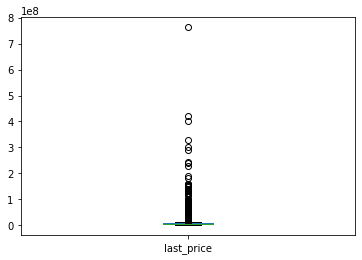

In [ ]:
data['last_price'].sort_values().head(10)
data = data.query('last_price > 12190')

# построим график, чтобы посмотреть количество выбросов
data['last_price'].sort_values().plot(y='last_price', kind='box')
data['last_price'].sort_values(ascending=False).head(10)
data['last_price'].describe()

<AxesSubplot:>

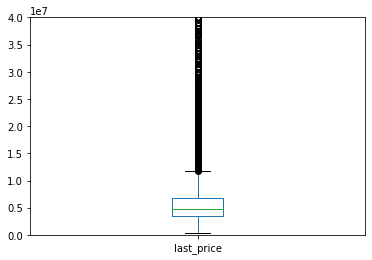

In [ ]:
# построим новый график
data['last_price'].sort_values().plot(y='last_price', kind='box', ylim=(0, 40000000))

Удалять аномальные значения по общей площади квартир (столбец `total_area`) сложно, так как квартиры на рынке бывают абсолютно разные, но можно выделить определенные условия. Сначала удалим строки с квартирами, площадь которых меньше 28 квадратных метров, но которые НЕ являются студиями, потому что таких 1-комнатных или 2-комнатных квартир не может существовать (в том числе по правилам стандартов).

In [ ]:
data.loc[((data['total_area'] <= 28) & (data['studio'] == False))] # таких строк 343 = 2% от всего датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000,21,2019-02-07,1,2.90,8,8,7,NaN,False,False,6,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN
296,4,1690000,28,2017-08-09,1,2.65,5,17,1,NaN,False,False,6,0,Выборг,NaN,NaN,0,NaN,0,NaN,14.0
322,6,2000000,25,2017-02-07,1,2.65,5,17,5,False,False,False,15,0,Выборг,NaN,NaN,0,NaN,0,NaN,45.0
349,4,2320000,25,2017-09-27,0,2.65,14,17,1,NaN,False,True,15,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
476,9,1634000,28,2017-11-10,1,2.65,5,15,4,NaN,False,False,5,1,село Павлово,NaN,NaN,0,NaN,0,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,12,3590000,26,2018-07-10,1,2.70,25,16,8,NaN,False,False,16,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,67.0
23191,3,1900000,18,2016-04-04,1,2.65,16,16,12,NaN,False,False,11,0,Тосно,NaN,NaN,0,NaN,0,NaN,115.0
23199,6,2200000,28,2017-11-10,1,2.60,5,16,3,NaN,False,False,5,1,село Павлово,NaN,NaN,0,NaN,0,NaN,518.0
23579,7,2350000,24,2018-06-07,1,2.65,10,18,2,NaN,False,False,15,0,Кудрово,NaN,NaN,0,NaN,0,NaN,89.0


In [ ]:
# удаляем квартиры с площадью менее 28 и которые не являются студиями (False)
data = data.loc[~((data['total_area'] <= 28) & (data['studio'] == False))]
# сбрасываем индексы после удаления строк
data = data.reset_index(drop=True)

Студии (столбец `studio`), в которых комнат больше 1, удаляются.

In [ ]:
# создаем условие для выбора строк, которые нужно удалить
condition_to_drop = (data['studio'] == True) & (data['rooms'] > 1)

# удаляем строки, удовлетворяющие условию
data.drop(data.loc[condition_to_drop].index, inplace=True)

Исследуем количество комнат (столбец `rooms`). Квартиры, в которых 0 комнат, можно объяснить тем, что они являются студией, в таком случае во всех студиях 0 заменяется на 1. По графику зависимости цены от количества комнат заметно, что есть очень выбивающиеся значения. Просмотрели эти строки - их всего две, удалили их.

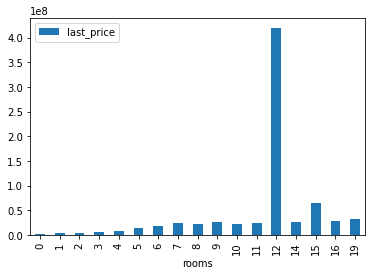

In [ ]:
# преобразуем 'studio' в булев тип данных
data['studio'] = data['studio'].astype(bool)

# убедимся, что столбец 'rooms' имеет тип данных integer (целочисленный)
data['rooms'] = data['rooms'].astype(int)

# заменяем значение 0 на 1 в столбце 'rooms', если в столбце 'studio' стоит True
data.loc[data['studio'] == True, 'rooms'] = 1

# посмотрим, как меняется цена в зависимости от количества комнат
pivot_rooms = pd.pivot_table(data, index='rooms', values='last_price', aggfunc='median')
pivot_rooms.plot(kind='bar')

# изучим строки с выбивающимися значениями
data.query('rooms == 12')
data.query('rooms == 15')

# удалим из датасета 2 строки
data = data.query('rooms != 12 and rooms != 15')

Столбец `living_area`. Было принято решение удалить все строки, в которых на каждую комнату приходилось менее 10 метров, только если квартира не является студией. Границы максимальных значений крайне сложно указать, так как те же элитные ЖК в Санкт-Петербурге имеют квартиры с большей площадью, чем максимальная в нашем датасете (она, кстати, равна 409.7 метрам).

In [ ]:
# удаление строк, где на каждую комнату приходится меньше 10 метров жилой площади, если это не студия
for index, row in data.iterrows():
    if not row['studio'] and row['rooms'] != 0 and row['living_area'] / row['rooms'] < 10:
        data.drop(index, inplace=True)

В столбце `balcony` с информацией о количестве балконов обнаружены странные квартиры, в которых количество балконов больше, чем комнат. Можно допустить, что помимо того, что в каждой комнате есть балкон, балкон так же имеется на кухне, и удалить только те строки, в которых разница количества комнат и балконов больше 1. Также есть 24 студии, в которых целых 2 балкона, но было решено счесть этот фактор за уникальный элемент квартиры.

In [ ]:
data['balcony'].describe()
data = data.query('balcony - rooms <= 1')
data.query('studio == True and balcony > 1') # список студий с 2 балконами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
382,8,2480000,27,2018-03-12,1,2.65,17,24,4,NaN,True,False,0,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
1023,12,3240000,29,2018-10-30,1,2.65,24,17,2,NaN,True,False,0,2,Санкт-Петербург,35129.0,16293.0,0,NaN,1,475.0,13.0
1024,3,3900000,32,2016-10-18,1,2.70,24,18,2,NaN,True,False,0,2,Санкт-Петербург,44754.0,8409.0,1,609.0,0,NaN,540.0
1333,8,1950000,31,2019-01-29,1,2.65,18,18,11,NaN,True,False,0,2,Никольское,NaN,NaN,0,NaN,0,NaN,NaN
1394,11,2550000,30,2017-11-10,1,2.75,23,15,11,NaN,True,False,0,2,Санкт-Петербург,21928.0,17256.0,0,NaN,1,429.0,19.0
1795,14,2300000,29,2018-03-29,1,2.60,26,22,9,NaN,True,False,0,2,поселок имени Свердлова,NaN,NaN,0,NaN,0,NaN,115.0
1837,8,2900000,25,2019-02-21,1,2.65,18,15,18,NaN,True,False,0,2,Кудрово,NaN,NaN,0,NaN,0,NaN,NaN
1981,19,3550000,27,2017-12-06,1,2.75,18,18,12,NaN,True,False,0,2,Санкт-Петербург,34201.0,14069.0,0,NaN,0,NaN,226.0
2083,5,2250000,25,2016-06-07,1,2.65,12,17,8,False,True,False,0,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26.0
2235,4,3170000,28,2018-07-26,1,2.65,23,20,2,NaN,True,False,0,2,Санкт-Петербург,21460.0,16788.0,0,NaN,1,170.0,28.0


В столбце `days_exposition` есть крайне выбивающиеся значения. По гистограмме видно, что после 600-800 дней продается слишком маленькое количество квартир, удалим те строки, в которых квартира продается дольше 2 лет.

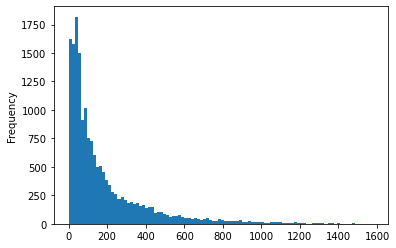

In [ ]:
data['days_exposition'].plot(kind='hist', bins=100)
data = data.query('days_exposition < 730')

**Вывод**: Некоторые аномальные значения поправляемы логическими решениями, но некоторые можно объяснить широким рынком, в котором есть как маленькие студии, объединенные квартиры, так и пентхаусы, в таких случаях удалять строки будет неверным решением. Некоторые аномалии могут быть работой мошенников, например, отсутствие или маленькое число фотографий. Часть аномалий попросту необъяснима, как случай с 18-комнатной квартирой, у которой нет ни одного балкона.

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
1. цена одного квадратного метра;
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
# создаем новый столбец 'price_per_sqm' с ценой одного квадратного метра
data['price_per_sqm'] = data['last_price'] / data['total_area']

In [ ]:
# создаем новый столбец 'weekday_published' с днем недели
data['weekday_published'] = data['first_day_exposition'].dt.weekday

In [ ]:
# создаем новый столбец 'month_published' с месяцем публикации
data['month_published'] = data['first_day_exposition'].dt.month

In [ ]:
# создаем новый столбец 'year_published' с годом публикации
data['year_published'] = data['first_day_exposition'].dt.year

In [ ]:
# создаем функцию, которая определяет тип этажа
def get_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# применяем функцию к каждой квартире и создаем новый столбец 'floor_type' с типом этажа
data['floor_type'] = data.apply(get_floor_type, axis=1)

In [ ]:
# создаем новый столбец 'good_cityCenter' с округленным расстоянием в км
data['good_cityCenter'] = round(data['cityCenters_nearest'] / 1000)

# проверим, все ли верно сосчитано
data[['cityCenters_nearest', 'good_cityCenter']].head()

,cityCenters_nearest,good_cityCenter
1,18603.0,19.0
2,13933.0,14.0
3,NaN,NaN
4,19143.0,19.0
6,NaN,NaN


<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Молодец, корректно созданы дополнительные столбцы с необходимыми метриками.

</div>

In [ ]:
# проверим новые столбцы, все ли верно отображается
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_published,month_published,year_published,floor_type,good_cityCenter
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750.000000,1,12,2018,первый,19.0
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,10,2890000,30,2018-09-10,1,2.65,12,14,5,NaN,False,False,9,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,96333.333333,0,9,2018,другой,NaN
4,6,3700000,37,2017-11-02,1,2.65,26,10,6,NaN,False,False,14,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,100000.000000,3,11,2017,другой,19.0
6,20,2900000,33,2018-05-23,1,2.65,27,15,26,NaN,False,False,8,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87878.787879,2,5,2018,другой,NaN


**Вывод:** Каждый добавленный столбец поможет лучше проанализировать зависимости.

### Проведем исследовательский анализ данных

**4.1 Гистограмма, показывающая распределение общих площадей квартир.** По вертикальной оси откладывается количество квартир, а по горизонтальной - их площадь.

Гистограмма показывает, что наиболее распространенная площадь квартир в наборе данных составляет от 50 до 100 кв. м. Также имеется значительное количество квартир площадью от 100 до 150 кв. м и меньшее количество квартир площадью от 150 до 200 кв. м.

Квартир площадью менее 50 кв. м и более 200 кв. м очень мало.

Text(0, 0.5, 'Количество квартир')

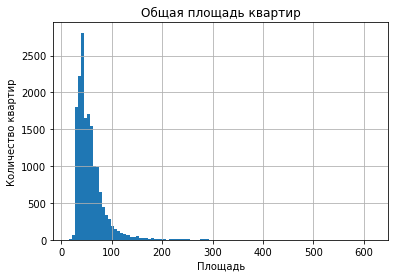

In [ ]:
# создаем гистограмму общей площади
data['total_area'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Общая площадь квартир')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение жилых площадей квартир.** По вертикальной оси откладывается количество квартир, а по горизонтальной - их жилая площадь.

Гистограмма показывает больше одного пика, первый наиболее частый интервал площадей находится от 20 до 25 кв. м. - этот пик приходится на однушки и студии, второй менее частый - на 25-30 кв. м., третий еще менее частый - на 30-50 кв. м. Начиная с 50 кв. м. жилой площади квартир становится сильно меньше, и от 100 кв. м. начинаются редкие пентхаусы, лофты и другие типы недвижимости, которые отличаются от общего массива своими большими площадями.

Text(0, 0.5, 'Количество квартир')

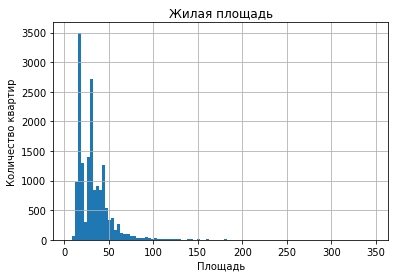

In [ ]:
# создаем гистограмму общей площади
data['living_area'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Жилая площадь')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение площадей кухонь.** Около 0 кв. м. видно количество студий, в которых кухни совмещены с жилым помещением. Наибольшее количество квартир имеют кухни площадью 5-10 кв. м., далее с увеличиванием площади идет снижение количества квартир.

Text(0, 0.5, 'Количество квартир')

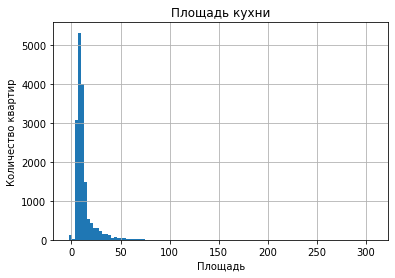

In [ ]:
# создаем гистограмму площади кухни
data['kitchen_area'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Площадь кухни')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение цен на квартиры.** Интервал самых часто встречаемых цен - от 4 до 7 миллионов, после этого интервала количество квартир с повышением цены постепенно идет на убывание. Ранжирование было поставлено в соответствии с анализом в предыдущих частях.

Text(0, 0.5, 'Количество квартир')

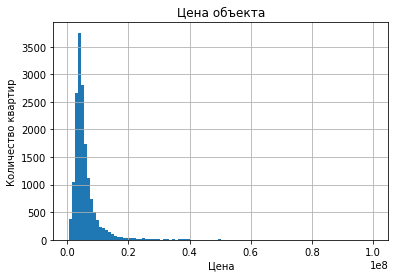

In [ ]:
# создаем гистограмму цен на квартиры
data['last_price'].plot(kind='hist', bins=100, range=(4.300000e+05, 100000000))
plt.grid(True)
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение количества комнат.** Самое больше количество квартир - с 1 (самое большое число квартир) и 2 комнатами, много также 3-комнатных квартир, мало 4-7 комнатных квартир, и совсем мало квартир с большим количеством комнат, на графике их не видно.

Text(0, 0.5, 'Количество квартир')

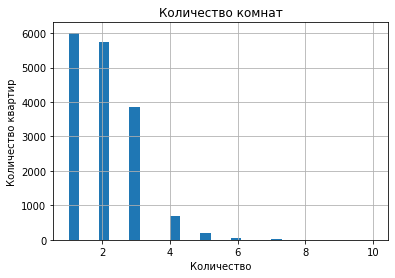

In [ ]:
# создаем гистограмму комнатности квартир
data['rooms'].plot(kind='hist', bins=30, range=(1, 10))
plt.grid(True)
plt.title('Количество комнат')
plt.xlabel('Количество')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение высоты потолков.** Всех больше квартир с высотой потолков 2.65 м, часто встречаются квартиры с потолками 2.5 м, после потолков 3 м количество квартир сильно уменьшается - таких квартир единицы. Ранжирование также было поставлено в соответствии с анализом высоты потолков в предыдущей части исследования.

Text(0, 0.5, 'Количество квартир')

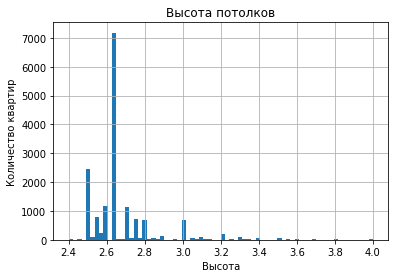

In [ ]:
# создаем гистограмму по высоте потолков
data['ceiling_height'].plot(kind='hist', bins=70, range=(2.4, 4))
plt.grid(True)
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение этажа, на котором расположена квартира.** Большинство квартир расположено на 1-5 этажах, самый частый этаж - второй.

Text(0, 0.5, 'Количество квартир')

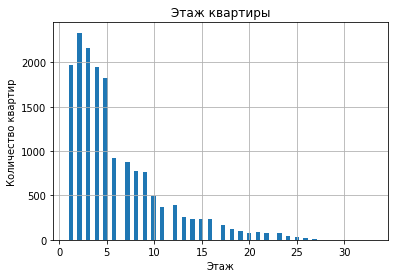

In [ ]:
# создаем гистограмму по этажу квартиры
data['floor'].plot(kind='hist', bins=70)
plt.grid(True)
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

**Диаграмма, показывающая распределение квартир по типам этажа.** Для лучшей визуализации категориальных данных сделаем столбчатую диаграмму. Большинство квартир находится на этаже типа "другой", на первом и последнем этажах находится почти равное количество квартир, однако на последнем - больше.

Text(0, 0.5, 'Количество квартир')

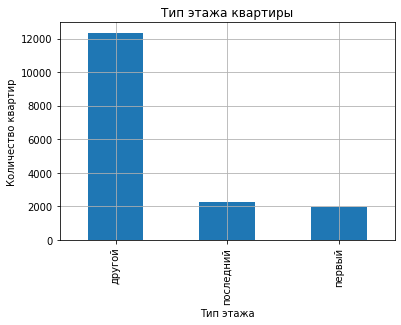

In [ ]:
# создаем диаграмму по типу этажу квартиры
floor_counts = data['floor_type'].value_counts()
floor_counts.plot(kind='bar')
plt.grid(True)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение квартир по этажности дома.** Наибольшее число квартир находится в 5-этажном доме, много квартир находится в 9-этажных домах, что объясняется популярностью "пятиэтажек" и "девятиэтажек" в России.

Text(0, 0.5, 'Количество квартир')

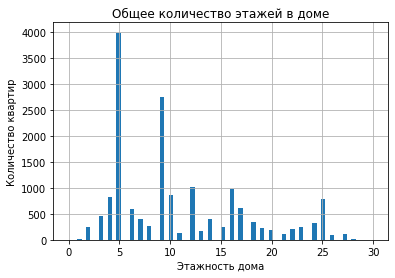

In [ ]:
# создаем гистограмму по этажности дома
data['floors_total'].plot(kind='hist', bins=70, range=(0, 30))
plt.grid(True)
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение квартир по расстоянию до центра города.** Больше всего квартир расположено в пределах от 11 000 до 17 000 метров от центра города. Значительное количество квартир расположено на расстоянии от 5 до 10 тысяч метров от центра города. Количество квартир уменьшается по мере увеличения расстояния до центра города. Лишь несколько квартир расположены на расстоянии более 50 000 метров от центра города.

Text(0, 0.5, 'Количество квартир')

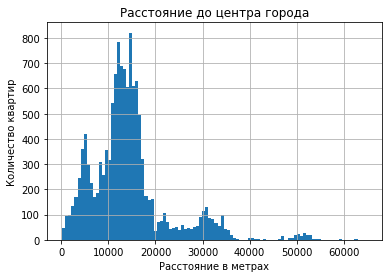

In [ ]:
# создаем гистограмму по расстоянию до центра города
data['cityCenters_nearest'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение квартир по расстоянию до ближайшего аэропорта.** Большинство квартир расположены на расстоянии от аэропорта в 10-28 км и от 30 до 38 км.

Text(0, 0.5, 'Количество квартир')

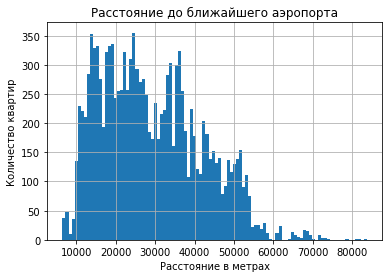

In [ ]:
# создаем гистограмму по расстоянию до ближайшего аэропорта
data['airports_nearest'].plot(kind='hist', bins=100)
plt.grid(True)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')

**Гистограмма, показывающая распределение квартир по расстоянию до ближайшего парка.** Расстояние большинства квартир до парка приходятся на интервале от 380 до 580 метров. Самое большое количество квартир находится в 400 и 420 метрах от парка. После 1000 метров количество квартир становится сильно меньше, таких квартиры единицы.

Text(0, 0.5, 'Количество квартир')

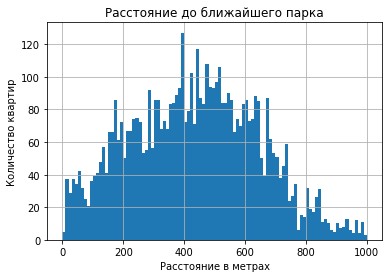

In [ ]:
# создаем гистограмму по расстоянию до ближайшего аэропорта
data['parks_nearest'].plot(kind='hist', bins=100, range=(0, 1000))
plt.grid(True)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Здорово, что ты используешь range, так нагляднее.

</div>

**Гистограмма, показывающая распределение квартир по дню и месяцу публикации объявляения.** Большинство объявлений опубликавано в будние дни, больше всех - в четверг, меньше - в воскресенье. Большинство квартир выставляются на продажу в феврале и ноябре, меньшинство в мае, январе и декабре.

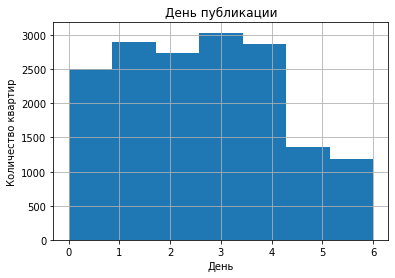

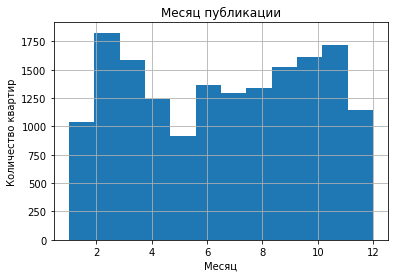

In [ ]:
# создаем гистограмму по дню недели публикации
data['weekday_published'].plot(kind='hist', bins=7)
plt.grid(True)
plt.title('День публикации')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()

# создаем гистограмму по месяцу публикации
data['month_published'].plot(kind='hist', bins=12)
plt.grid(True)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

**4.2 Данные о том, как быстро продавались квартиры (столбец days_exposition)**

По описанию данных, среднее число дней, которое квартира опубликовано = 157, медианное = 97 дней.

Судя по ящику с усами, необычно долгими являются продажи за более, чем 500 дней. Отбросим выбросы и построим график, по нему видно, что большая часть квартир продается на 45-тый день, будем считать, что квартиры проданные раньше - самые быстрые продажи, а квартиры проданные после 214 дня - самые долгие, необычно долгими явлются квартиры, проданные после 470 дня, их можно увидеть на графике с усами.

count    16604.000000
mean       152.296013
std        155.510750
min          1.000000
25%         44.000000
50%         92.000000
75%        209.000000
max        729.000000
Name: days_exposition, dtype: float64

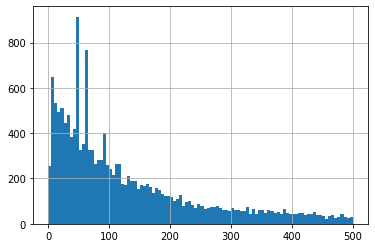

In [ ]:
#data['days_exposition'].plot(kind='box')

data['days_exposition'].hist(bins=100, range=(0, 500))
data['days_exposition'].describe()

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

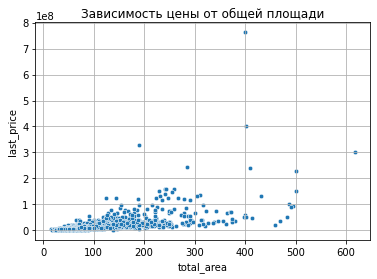

Text(0.5, 1.0, 'Зависимость цены от общей площади')

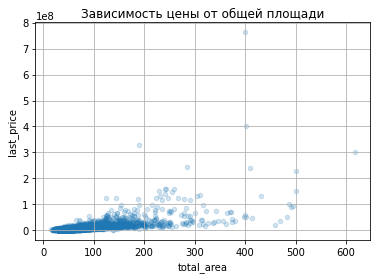

In [ ]:
# график зависимости цены от общей площади
data.plot(kind='scatter', x='total_area', y='last_price', grid=True, edgecolor='white', linewidth=0.5)
plt.title('Зависимость цены от общей площади')
plt.show()

data.plot(kind='scatter', x='total_area', y='last_price', grid=True, alpha=0.2)
plt.title('Зависимость цены от общей площади')

In [ ]:
data['total_area'].corr(data['last_price'])

0.619865140485222

Величина коэффициента корреляции 0.62 говорит нам о средней положительной зависимости общей площади и цены за квартиру.

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

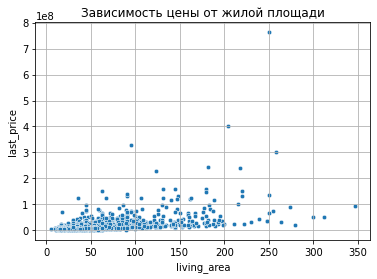

In [ ]:
# график зависимости цены от жилой площади
data.plot(kind='scatter', x='living_area', y='last_price', grid=True, edgecolor='white', linewidth=0.5)
plt.title('Зависимость цены от жилой площади')

In [ ]:
data['living_area'].corr(data['last_price'])

0.5256859569600739

Величина коэффициента корреляции 0.53 говорит нам о средней положительной зависимости жилой площади и цены за квартиру.

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

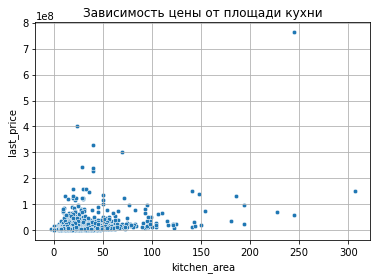

In [ ]:
# график зависимости цены от площади кухни
data.plot(kind='scatter', x='kitchen_area', y='last_price', grid=True, edgecolor='white', linewidth=0.5)
plt.title('Зависимость цены от площади кухни')

In [ ]:
data['kitchen_area'].corr(data['last_price'])

0.39599462407942865

Величина коэффициента корреляции 0.4 говорит нам о слабой положительной зависимости площади кухни и цены за квартиру, в большинстве случаев мы не берем такую зависимость в расчет.

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

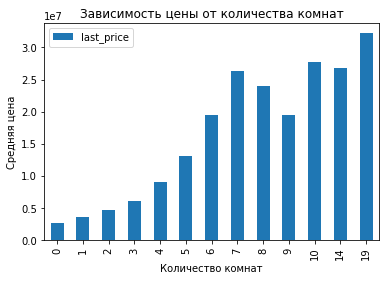

In [ ]:
# график зависимости цены от количества комнат
pivot_rooms = pd.pivot_table(data, index='rooms', values='last_price', aggfunc='median')
pivot_rooms.plot(kind='bar')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от количества комнат')

Text(0.5, 1.0, 'Зависимость цены от типа этажа')

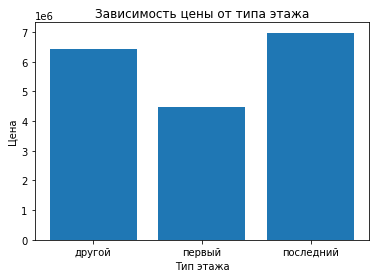

In [ ]:
# график зависимости цены от типа этажа, на котором расположена квартира
pivot_floor_type = pd.pivot_table(data, index='floor_type', values='last_price')
plt.bar(pivot_floor_type.index, pivot_floor_type['last_price'])
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.title('Зависимость цены от типа этажа')

#здесь мало группировок, поэтому видно, что с повышением этажа повышается цена

Text(0.5, 1.0, 'Зависимость цены от года размещения')

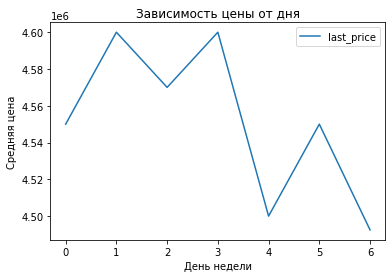

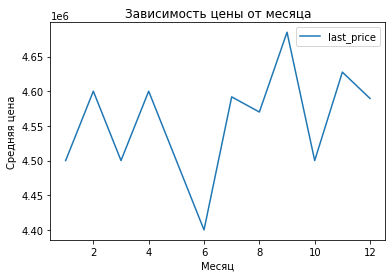

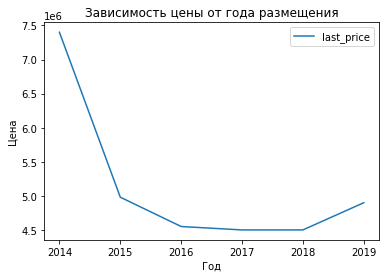

In [ ]:
# Группировка данных по дню недели размещения и построение графика зависимости цены от дня недели
pivot_weekday = pd.pivot_table(data, index='weekday_published', values='last_price', aggfunc='median')
pivot_weekday.plot(kind='line')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от дня')

# Группировка данных по месяцу размещения и построение графика зависимости цены от месяца
pivot_month = pd.pivot_table(data, index='month_published', values='last_price', aggfunc='median')
pivot_month.plot(kind='line')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от месяца')

# Группировка данных по году размещения и построение графика зависимости цены от года
pivot_year = pd.pivot_table(data, index='year_published', values='last_price', aggfunc='median')
pivot_year.plot(kind='line')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость цены от года размещения')

**Вывод:**

Графики зависимости и коэффициенты корреляции Пирсона по **зависимости цены от общей/жилой/кухонной площади** показывают положительную корреляцию, что означает, что с увеличением площади цена также имеет тенденцию к увеличению. Точки на диаграмме рассеяния сгруппированы вместе, что говорит о наличии сильной корреляции между этими двумя переменными. Однако есть и несколько выбросов, то есть точек, которые находятся дальше от остальных данных. Эти отклонения могут быть обусловлены рядом факторов, таких как местоположение квартиры, включенные в нее удобства или состояние квартиры, и все другие важные детали, которые сложно отследить. Это означает, что в целом квартиры с большей площадью, как правило, стоят дороже, чем квартиры с меньшей площадью.

На графике **заивисимости цены от количества комнат** видно, что до 9 комнаты идет прямая положительная зависимость цены от количества комнат, далее на цену начинает влиять какой-то дополнительный фактор (например, этаж, расположение дома).

Цена также зависит от **типа этажа**, цена увеличивается вместе с этажами, самые дешевые квартиры на первом, дорогие - на последнем.

Цена сильно зависит от **дня недели**, в которое выложено объявление, в будни - дорогие квартиры, в выходные - дешевле. От **месяца** цена почти не зависит, а по графику зависимости цены от **года публикации** можно увидеть, как с 2014 года резко упал рынок недвижимости, а с 2018 стал подниматься.

**4.4 Подсчет средней цены одного квадратного метра** в 10 населённых пунктах с наибольшим числом объявлений. Населенные пункты с самой высокой и низкой стоимостью квадратного метра.

In [ ]:
# выборка топ 10 населенных пунктов
top_10_localities = data['locality_name'].value_counts().head(10).index
# посчитаем среднюю цену одного квадратного метра в этой выборке
average_price_per_sqm = data[data['locality_name'].isin(top_10_localities)].groupby('locality_name')['price_per_sqm'].mean()
# выведем на экран в порядке убывания
average_price_per_sqm.sort_values(ascending=False)

locality_name
Санкт-Петербург      112952.748312
Пушкин               103601.383104
деревня Кудрово       92730.027998
поселок Парголово     90985.954164
поселок Мурино        85542.229730
поселок Шушары        79307.737878
Колпино               75436.328514
Гатчина               68113.158024
Всеволожск            67832.344158
Выборг                57001.399043
Name: price_per_sqm, dtype: float64

<AxesSubplot:xlabel='locality_name'>

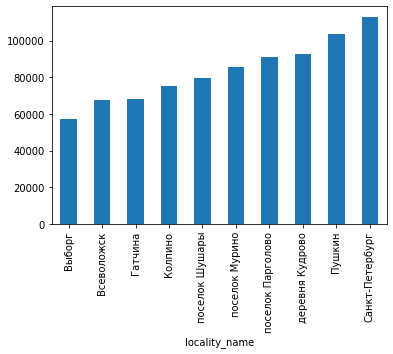

In [ ]:
average_price_per_sqm.sort_values().plot(kind='bar')

In [ ]:
# рассчитаем цены за метр по всему датасету
average_price_per_sqm_total = data.groupby('locality_name')['price_per_sqm'].mean()
average_price_per_sqm_total.sort_values(ascending=False).tail()
average_price_per_sqm_total.sort_values(ascending=False).head()
#data.query('locality_name == "поселок Лисий Нос"')

locality_name
поселок Лисий Нос    114316.860465
Санкт-Петербург      112952.748312
Зеленогорск          112816.699203
Сестрорецк           103847.375736
Пушкин               103601.383104
Name: price_per_sqm, dtype: float64

**Вывод:** Город с **самым дорогим квадратным метром - Санкт-Петербург (112 953 за м. кв.)**, не далеко от него ушел город Пушкин. Самый **дешевый** квадратный метр в выборке из 10 самых популярных населенных пунктов - **в Выборге (57 001 за м. кв.)**.

Во всем датасете самый дорогой квадратный метр - в поселке Лисий Нос (на 2 тысячи дороже, чем в Санкт-петербурге), это значение не является ошибкой, так как поселок является пригородом Спб, находится на побережье Невской губы и стоит на дороге к Кронштадту, такой ценник оправдан. Самый дешевый метр по всему датасету - в деревне Старополье (10.5 тысяч за метр).

**4.5 Средняя цена каждого километра отдаления от центра Санкт-Петербурга**

Text(0.5, 1.0, 'Зависимость стоимости объектов от расстояния до центра города')

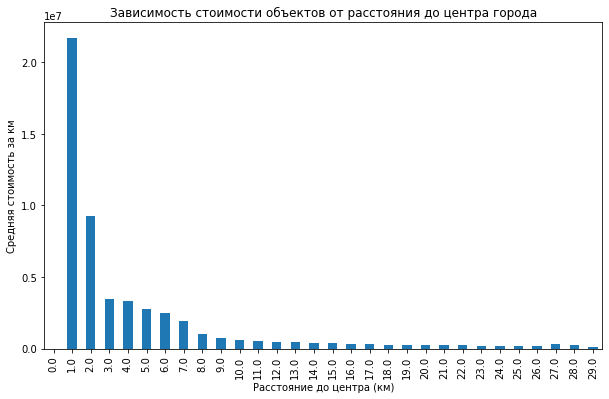

In [ ]:
spb_data = data.query('locality_name == "Санкт-Петербург"').copy()
spb_data['price_per_km'] = spb_data['last_price'] / spb_data['good_cityCenter']
avg_price_per_km = spb_data.groupby('good_cityCenter')['price_per_km'].mean()

avg_price_per_km.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость за км')
plt.title('Зависимость стоимости объектов от расстояния до центра города')

Text(0.5, 1.0, 'Зависимость стоимости объектов от расстояния до центра города')

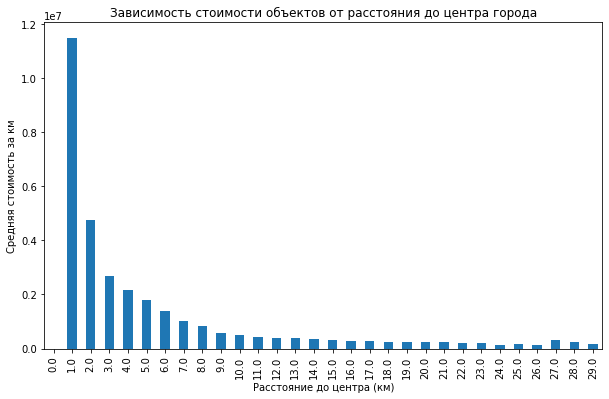

In [ ]:
# из прошлой ячейки сгруппированы данные по километру и рассчитана медиана цены по каждому километру
avg_price_per_km_median = spb_data.groupby('good_cityCenter')['price_per_km'].median()

avg_price_per_km_median.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость за км')
plt.title('Зависимость стоимости объектов от расстояния до центра города')

**Вывод:** Самые дорогие квартиры находятся в районе 1 км от центра города (11 490 000 рублей), что может объясняться близостью к основным достопримечательностям, удобствам и инфраструктуре. После этого цены начинают снижаться с увеличением расстояния от центра.

После 7 км от центра цены держатся относительно на одном низком уровне. Это может свидетельствовать о более спокойных и удаленных районах, где спрос на квартиры снижается и цены остаются более стабильными.

# Вывод:

В ходе данного исследования объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах были выполнены следующие шаги:

Обнаружено 3 704 пропущенных значения в столбце "высота потолков", 1 866 пропущенных значений в столбце "площадь кухни" и 1 447 пропущенных значений в столбце "жилая площадь". Большинство значений в географических данных, которые собирает система, - являются пропусками. Пропущенные значения были заполнены медианными значениями, чтобы избежать потери данных, логическими значениями, нулями или оставлены нетронутыми. Изменены типы данных для более эффективного анализа: столбцы "цена", "общая площадь", "жилая площадь", "кухонная площадь", "количество комнат" и "высота потолков" были преобразованы в числовой формат.

Определены основные характеристики квартир: наиболее распространенные **площади** квартир составляют **от 50 до 100 кв. м**, наиболее часто встречаемые **цены находятся в интервале от 4 до 7 миллионов рублей**, наибольшее количество квартир имеют **кухни площадью 5-10 кв. м**, и самые часто встречаемые этажи - другие (все, кроме первого и последнего).

Изучено время продажи квартир: **среднее время продажи составляет 157 дней, медианное - 97 дней**, выявлены аномально долгие продажи (после 214 дня), которые следует учесть при анализе.

Проанализирована зависимость цены от различных характеристик квартир, таких как площадь, количество комнат, высота потолков, этажность дома и день недели размещения объявления. Выявлена положительная корреляция между ценой квартиры и ее площадью, а также зависимость цены от типа этажа и дня недели размещения объявления.

Изучены цены на квадратный метр недвижимости в различных населенных пунктах. **Самый дорогой квадратный метр - в Санкт-Петербурге с ценой 112 953 рублей, а самый дешевый - в Выборге с ценой 57 001 рублей**.
Изучено влияние удаленности от центра города на цену квартиры. Квартиры в районе 1 км от центра имеют среднюю цену 11 490 000 рублей, а с увеличением расстояния от центра цены снижаются.

Промежуточные выводы:
- Определены характеристики квартир, которые наиболее влияют на их стоимость: площадь, количество комнат и удаленность от центра города.
- Выявлены особенности рынка недвижимости в Санкт-Петербурге и соседних населенных пунктах, такие как различие в стоимости квадратного метра и зависимость цены от удаленности от центра.
- Обнаружены аномалии в данных, которые могут повлиять на результаты анализа и требуют дополнительного внимания.

Проведенное исследование поможет понять особенности рынка недвижимости в регионе и может быть использовано для разработки автоматизированной системы анализа объявлений о продаже квартир, что позволит более точно выявлять аномалии и мошенническую деятельность. Полученные результаты станут полезным инструментом для принятия решений в сфере недвижимости и помогут определить оптимальные параметры для продажи квартир.
